Task 2: Calculating Mandelbrot Set

Ref: https://en.wikipedia.org/wiki/Mandelbrot_set


Runtime:
512 ms ± 51.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


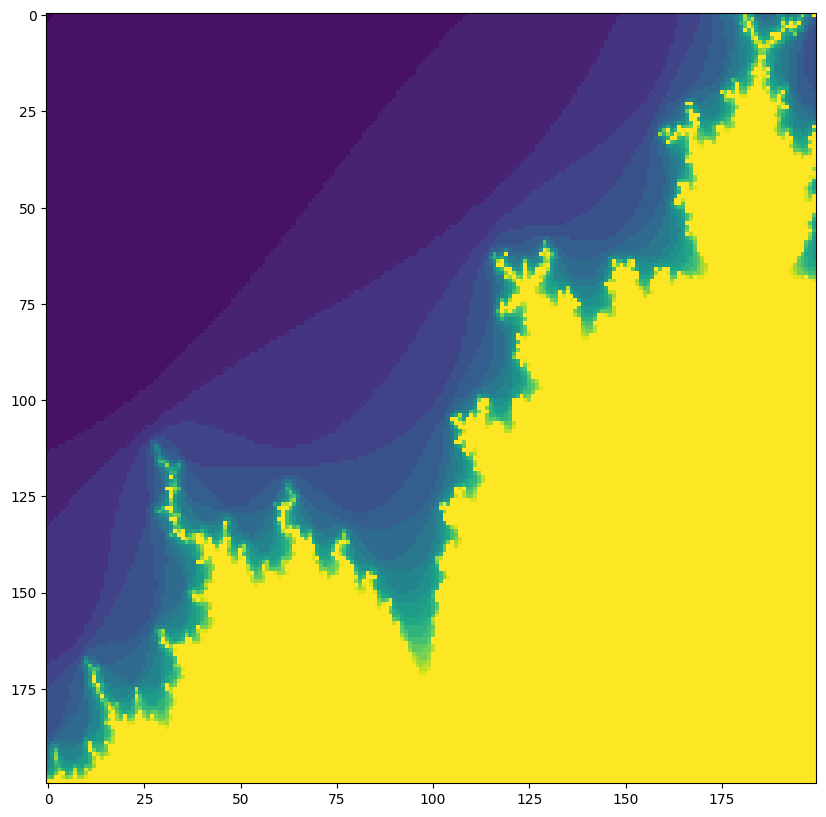

In [ ]:
# Mandelbrot Set
import math
import numpy as np
import matplotlib.pyplot as plt


def mandelbrot_python(height, width):
  y, x = np.ogrid[-1:0:height*1j, -1.5:0:width*1j]
  c = x + y*1j
  fractal = np.full(c.shape, 20, dtype=np.int32)
  for h in range(height):
    for w in range(width):            # for each pixel (h, w)...
      z = c[h, w]
      for i in range(20):             # iterate at most 20 times
        z = z**2 + c[h, w]            # applying z → z² + c
        if abs(z) > 2:                # if it diverges (|z| > 2)
          fractal[h, w] = i           # color the plane with the iteration number
          break                       # we're done, no need to keep iterating
  return fractal


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.imshow(mandelbrot_python(200, 200))


print("\nRuntime:")
%timeit -n 1 mandelbrot_python(200, 200)

Task 2: Implement the mandelbrot set calculation with JAX to produce a higher resolution picture (height $\times$ width $\geq$ 1000 $\times$ 1000) in shorter time!


Runtime:
45.9 ms ± 7.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


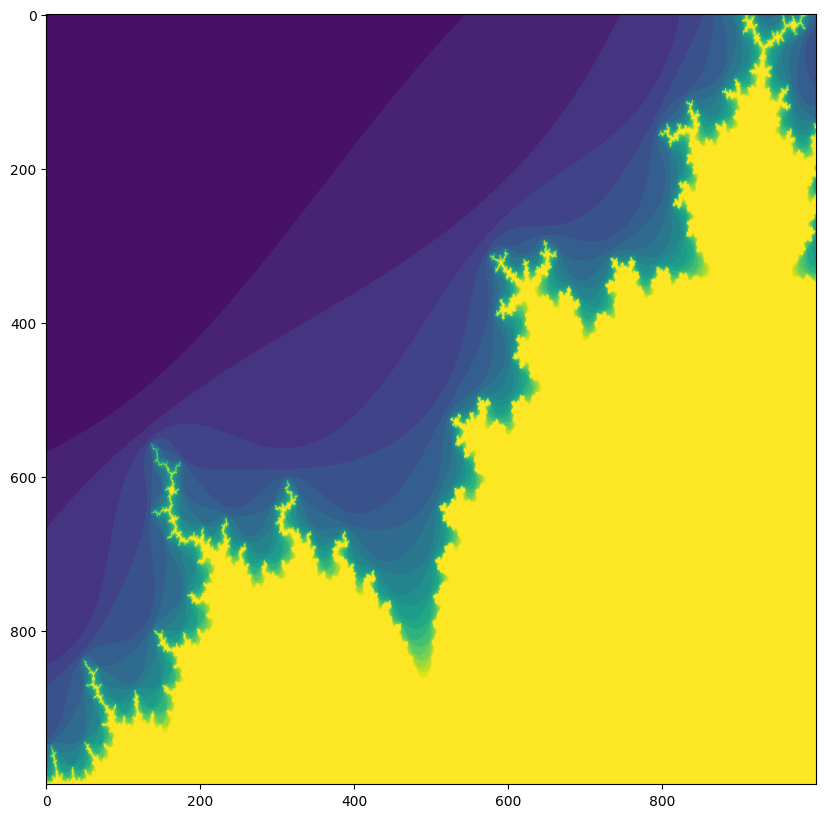

In [ ]:
# Solution

import jax
import jax.numpy as jnp


@jax.jit
def mandelbrot_kernel(c, fractal):
  z = c
  for i in range(20):
    z = z**2 + c
    diverged = jnp.absolute(z) > 2
    diverging_now = diverged & (fractal == 20)
    fractal = jnp.where(diverging_now, i, fractal)  # <--- use a ternary operator ("where") instead of masked-assignment
  return fractal


def mandelbrot_jax(height, width):
  y, x = jnp.ogrid[-1:0:height*1j, -1.5:0:width*1j]
  c = x + y*1j
  fractal = jnp.full(c.shape, 20)
  return mandelbrot_kernel(c, fractal)


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.imshow(mandelbrot_jax(1000, 1000))


print("\nRuntime:")
%timeit -n 10 mandelbrot_jax(1000, 1000).block_until_ready()